<a href="https://colab.research.google.com/github/abolfazlshahsavaryyy/sklearn/blob/main/sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
medical_charge_url="https://gist.githubusercontent.com/meperezcuello/82a9f1c1c473d6585e750ad2e3c05a41/raw/d42d226d0dd64e7f5395a0eec1b9190a10edbc03/Medical_Cost.csv"

In [2]:
from urllib.request import urlretrieve
urlretrieve(medical_charge_url,"data.csv")

('data.csv', <http.client.HTTPMessage at 0x7cd2c4111090>)

In [3]:
import pandas as pd
mdf=pd.read_csv("data.csv")

In [4]:
mdf.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
len(mdf[mdf["sex"]=="male"])

676

In [6]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
mdf.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
import numpy as np
import matplotlib.pyplot as plt


In [9]:
pip install jovian --quiet

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 1.2 MB/s eta 0:00:00


In [10]:
import jovian

In [11]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


In [12]:
pip install plotly seaborn --quiet


In [13]:
import plotly.express as px
import matplotlib
import  seaborn as sns

In [14]:
mdf.age.describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [15]:
fig=px.histogram(mdf,x="age",marginal='box',nbins=100,title="distribiotion of age")


In [16]:
fig.update_layout(bargap=0.1)

In [17]:
fig.show()

In [18]:
fig=px.histogram(mdf,x="bmi",marginal='box',color_discrete_sequence=['red'],title='distribution of bmi')
fig.update_layout(bargap=0.1)
fig.show()

In [19]:
fig=px.histogram(mdf,x="charges",marginal='box',color_discrete_sequence=['blue','gray','red','green'],color='region',title="annual medical charge")

In [20]:
fig.show()

In [21]:
print("male: "+ str(len(mdf[mdf['sex']=='male'])))
print("female: "+ str(len(mdf[mdf['sex']=='female'])))
print(set(mdf.region))

male: 676
female: 662
{'northwest', 'northeast', 'southeast', 'southwest'}


In [22]:
px.histogram(mdf,x='smoker',color='children',barmode='stack')

In [23]:
fig=px.scatter(mdf,x='age',y='charges',color='smoker',title="age vs charges")
fig.show()

In [24]:
fig=px.scatter(mdf,x='sex',y='charges',title="bmi vs charges")
fig.show()

In [25]:
px.violin(mdf,x='children',y='charges')

In [26]:
mdf.charges.corr(mdf.age)

0.2990081933306476

In [27]:
mdf.charges.corr(mdf.bmi)

0.19834096883362895

In [28]:
smoker_numerical=mdf['smoker'].apply(lambda x :1 if x=='yes' else 0)
smoker_numerical

,smoker
0,1
1,0
2,0
3,0
4,0
...,...
1333,0
1334,0
1335,0
1336,0


In [29]:
mdf.charges.corr(smoker_numerical)

0.787251430498478

In [30]:
px.scatter(mdf,x=smoker_numerical,y=mdf['charges'])

In [31]:
print(mdf.select_dtypes(include='number').corr())

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


<Axes: >

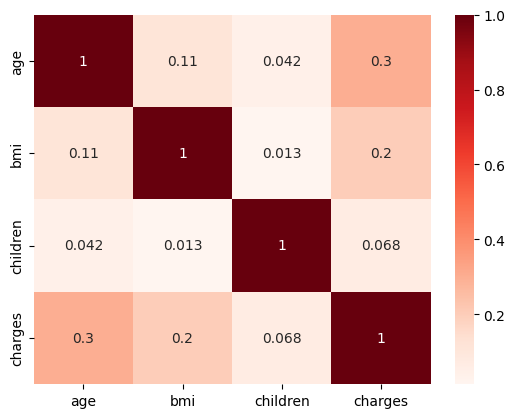

In [32]:
sns.heatmap(mdf.select_dtypes(include='number').corr(),cmap='Reds',annot=True)


<Axes: xlabel='age', ylabel='charges'>

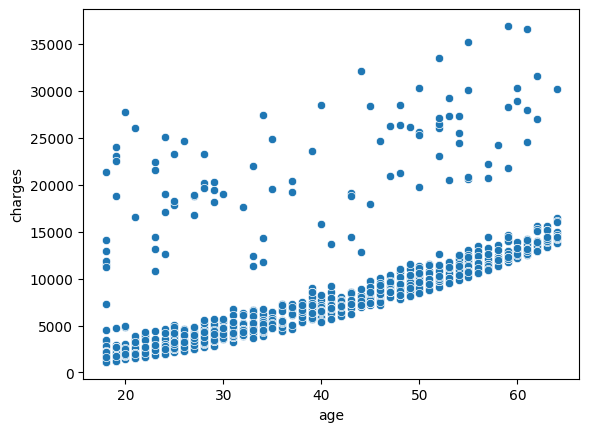

In [33]:
nsmdf=mdf[mdf['smoker']=='no']
sns.scatterplot(data=nsmdf,x='age',y='charges')

In [34]:
def astemed_charges(age,w:int,b:int):
  return age*w+b


In [35]:
# Assuming ages is a pandas Series (e.g., nsmdf['age'])
ages = nsmdf['age']

w, b = 270, -3800
ast_charges = astemed_charges(ages, w, b)

# Corrected iteration
counter=0
for age,charge in zip(ages,ast_charges):
  print(str(age)+": "+str(charge))
  counter+=1
  if counter==10:
    break


18: 1060
28: 3760
33: 5110
32: 4840
31: 4570
46: 8620
37: 6190
37: 6190
60: 12400
25: 2950


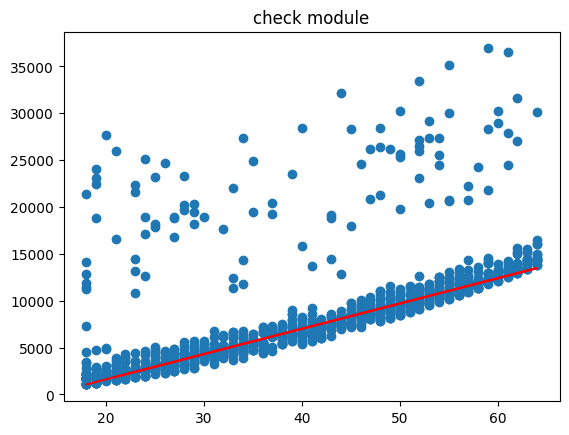

In [36]:

plt.scatter(nsmdf['age'],nsmdf['charges'])
plt.plot(ages,ast_charges,color='red')
plt.title("check module")
plt.show()

In [37]:
def try_astemed(w,b):
  ast_cahrges=astemed_charges(nsmdf['age'],w,b)
  y_test=nsmdf['charges']
  x_test=nsmdf['age']

  plt.scatter(x_test,y_test)
  plt.plot(x_test,ast_charges,color='red')
  plt.title("check module")
  plt.xlabel="ages"
  plt.ylabel="charges"
  plt.show()

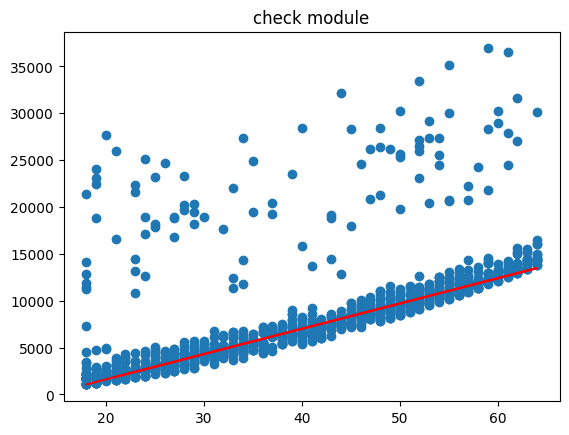

In [38]:
try_astemed(200,000)

In [39]:
def cul_rmse(target,pred):
  return np.sqrt(np.mean(np.square(target-pred)))

In [40]:
cul_rmse(nsmdf['charges'],ast_charges)

4929.6233160122965

In [41]:
def try_astemed(weight,c):
  ast_cahrges=astemed_charges(nsmdf['age'],weight,c)
  y_test=nsmdf['charges']
  x_test=nsmdf['age']

  plt.scatter(x_test,y_test)
  plt.plot(x_test,ast_cahrges,color='red')
  plt.title("check module")
  plt.xlabel="ages"
  plt.ylabel="charges"
  plt.show()

  rsme=cul_rmse(y_test,ast_cahrges)
  print(rsme)

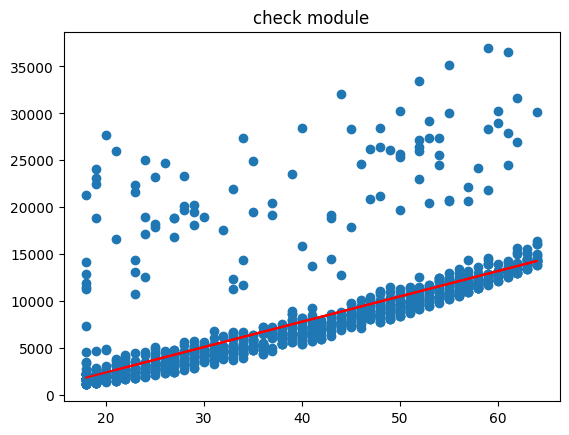

4730.837444535129


In [42]:
try_astemed(270,-3000)

In [43]:
pip install scikit-learn --quiet

In [44]:
from sklearn.linear_model import LinearRegression


In [45]:
module=LinearRegression()

In [46]:
input=nsmdf[['age']]
target=nsmdf['charges']


In [47]:
module.fit(input,target)

LinearRegression()

In [48]:
pred=module.predict(input)
pred

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

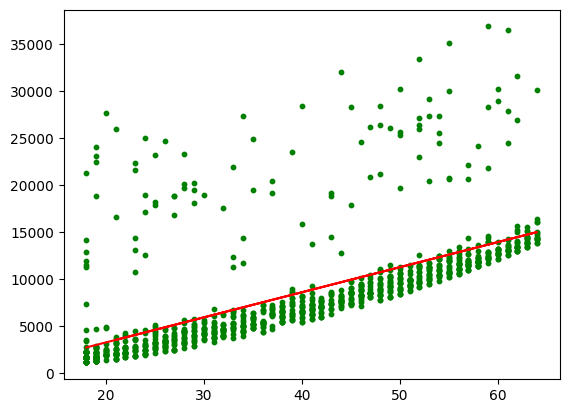

In [49]:
plt.scatter(input,target,color="green",s=10)
plt.plot(input,pred,color="red")
plt.show()

In [50]:
cul_rmse(target,pred)

4662.505766636395

In [51]:
module.predict(np.array([[19]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([2986.30878723])

In [52]:
clean_data=nsmdf[(nsmdf['charges']>1000 )&( nsmdf['charges']<16000)]

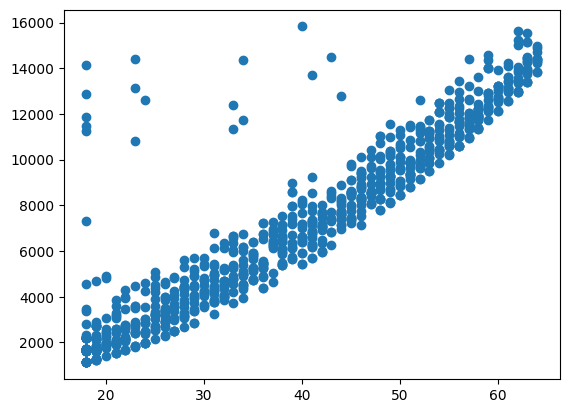

In [53]:
plt.scatter(clean_data['age'],clean_data['charges'])

In [54]:
module1=LinearRegression()

In [55]:
module1.fit(np.reshape(clean_data['age'],(-1,1)),clean_data['charges'])

LinearRegression()

In [56]:
pred1=module1.predict(np.reshape(clean_data['age'],(-1,1)))

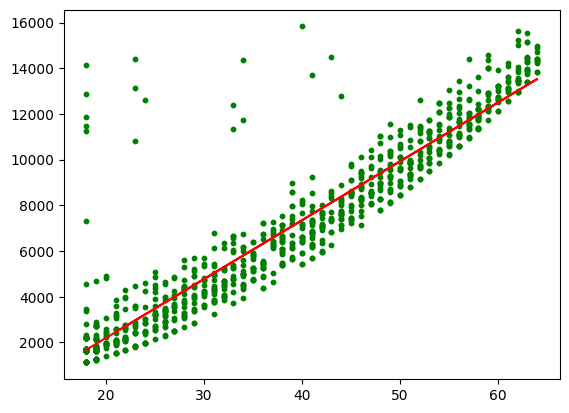

In [57]:
plt.scatter(np.reshape(clean_data['age'],(-1,1)),clean_data['charges'],color="green",s=10)
plt.plot(np.reshape(clean_data['age'],(-1,1)),pred1,color="red")
plt.show()

In [58]:
module1.score(np.reshape(clean_data['age'],(-1,1)),clean_data['charges'])

0.8625689537469239

In [59]:
cul_rmse(clean_data['charges'],pred1)

1440.589993319875

In [60]:
module1.predict(np.array([[19]]))

array([1936.77891094])

In [61]:
smdf=mdf[mdf['smoker']=='yes']

In [62]:
smdf

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


In [63]:
input=smdf[['age']]
target=smdf['charges']

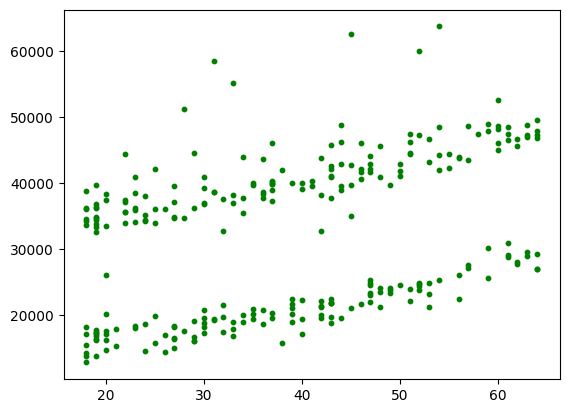

In [64]:
plt.scatter(input,target,s=10,color='green')
plt.show()

In [65]:
module2=LinearRegression()
module2.fit(input,target)
pred2=module2.predict(input)


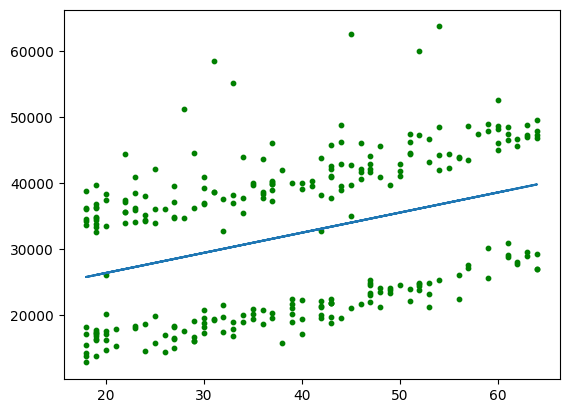

In [66]:
plt.scatter(input,target,color='green',s=10)
plt.plot(input,pred2)
plt.show()

In [67]:
cul_rmse(target,pred2)

10711.00334810241

In [68]:
input,target=nsmdf[['age','bmi','children']],nsmdf['charges']

In [69]:
module=LinearRegression().fit(input,target)

In [70]:
pred=module.predict(input)

In [71]:
cul_rmse(target,pred)

4608.470405038247

In [72]:
nsmdf.charges.corr(nsmdf.bmi)

0.0840365431283327

In [73]:
module.coef_,module.intercept_

(array([265.2938443 ,   5.27956313, 580.65965053]), -2809.2976032235892)

In [74]:
nsmdf.charges.corr(nsmdf.children)

0.13892870453542192

In [75]:
fig=px.strip(nsmdf,x='children',y='charges')
fig.show()

In [76]:
input,target=mdf[['age','children','bmi']],mdf['charges']
module=LinearRegression().fit(input,target)
pred=module.predict(input)
cul_rmse(target,pred)

11355.317901125973

<Axes: xlabel='smoker', ylabel='charges'>

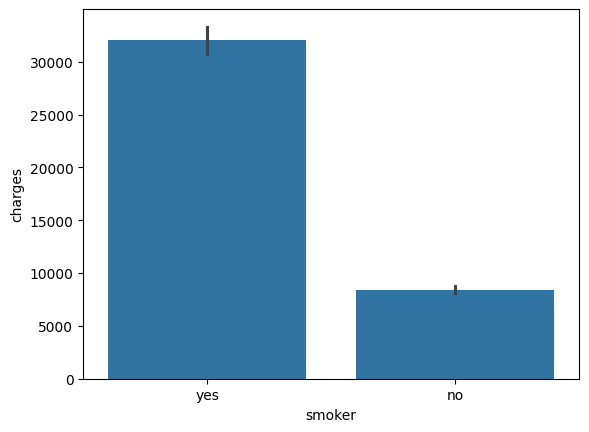

In [77]:
sns.barplot(mdf,x="smoker",y="charges")

In [78]:
smoker_code={'no':0,'yes':1}

mdf['smoker_code']=mdf.smoker.map(smoker_code)

In [79]:
mdf

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [80]:
type(mdf.smoker)

pandas.core.series.Series

In [81]:
type(mdf)

pandas.core.frame.DataFrame

In [82]:
mdf.charges.corr(mdf.smoker_code)

0.787251430498478

In [83]:
px.scatter(mdf,x='smoker_code',y='charges')

In [84]:
input,target=mdf[['age','bmi','children','smoker_code']],mdf['charges']

module=LinearRegression().fit(input,target)
pred=module.predict(input)

cul_rmse(target,pred)

6056.439217188081

In [85]:
px.scatter(mdf,x='sex',y='charges')


In [86]:
sex_code={'female':0,'male':1}
mdf['sex_code']=mdf.sex.map(sex_code)
mdf

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [87]:
input,target=mdf[['age','bmi','children','smoker_code','sex_code']],mdf['charges']

module=LinearRegression().fit(input,target)
pred=module.predict(input)

cul_rmse(target,pred)

6056.100708754546

<Axes: xlabel='region', ylabel='charges'>

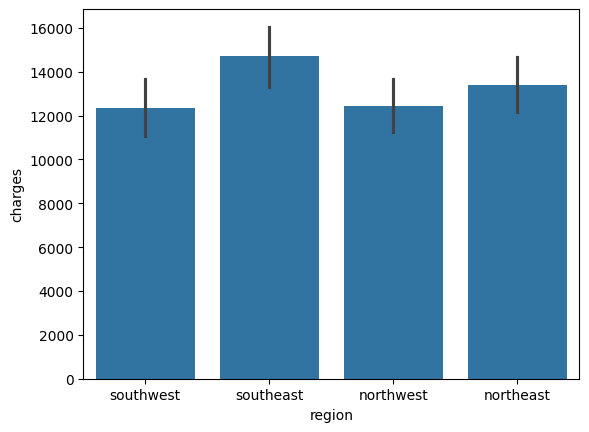

In [88]:
sns.barplot(data=mdf,x='region',y='charges')

In [89]:
from sklearn import preprocessing

In [90]:
enc=preprocessing.OneHotEncoder()
enc.fit(mdf[['region']])
enc.categories_
one_hot=enc.transform(mdf[['region']]).toarray()
one_hot
mdf[['northeast','northwest','southeast','southwest']]=one_hot

In [91]:
mdf

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [92]:
input,target=mdf[['age','bmi','children','smoker_code','sex_code','northeast','northwest','southeast','southwest']],mdf['charges']

module=LinearRegression().fit(input,target)
pred=module.predict(input)

cul_rmse(target,pred)

6041.6796511744515

In [93]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


In [94]:
input_smoker,target_smoker=(mdf[mdf['smoker']=='yes'])[['age','bmi','children','sex_code','northeast','northwest','southeast','southwest']],(mdf[mdf['smoker']=='yes'])['charges']

In [96]:
input_no_smoker,target_no_smoker=(mdf[mdf['smoker']=='no'])[['age','bmi','children','sex_code','northeast','northwest','southeast','southwest']],(mdf[mdf['smoker']=='no'])['charges']

In [97]:
module_smoker=LinearRegression().fit(input_smoker,target_smoker)
module_no_smoker=LinearRegression().fit(input_no_smoker,target_no_smoker)

In [98]:
pred_smoker=module_smoker.predict(input_smoker)
pred_no_smoker=module_no_smoker.predict(input_no_smoker)

In [99]:
print("smoker RMSE: "+str(cul_rmse(target_smoker,pred_smoker)))
print("no smoker RMSE: "+str(cul_rmse(target_no_smoker,pred_no_smoker)))

smoker RMSE: 5668.4678821121515
no smoker RMSE: 4573.074988795492


In [100]:
from sklearn.preprocessing import StandardScaler
number_columns=['age','bmi','children']
scaler=StandardScaler()
scaler.fit(mdf[number_columns])

StandardScaler()

In [101]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [102]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])